# TUGAS MANDIRI
## Pertemuan 3 - Semester 7
---
Tugas mandiri ini digunakan pada kegiatan Kursus Data Science yang merupakan pembekalan bagi mahasiswa Universitas Gunadarma untuk Skema Associate Data Scientist

---

## Nama: Haidar Maula Reynaldy
## NPM: 50421582
## Kelas: 4IA12

## A. Business Understanding

Tujuan dari proyek ini adalah membantu pengguna memprediksi pergerakan harian harga saham bank BNI dengan mempertimbangkan beberapa faktor:
1. Harga pembukaan saham BBNI pada hari tersebut 
2. Harga tertinggi saham yang dicapai selama hari perdagangan
3. Harga terendah saham yang dicapai selama hari perdagangan
4. Jumlah saham yang diperdagangkan pada hari tersebut

## B. Data Understanding

Proyek ini menggunakan dataset yang berisi sejarah harga saham bank BNI dari tanggal 1 Januari 2019 hingga 27 September 2024. Dataset yang digunakan terdiri dari beberapa kolom di bawah ini:
1. **Date**: Tanggal untuk setiap entri data, menandakan hari perdagangan saham (dalam format objek).
2. **Open**: Harga pembukaan saham BBNI pada hari tersebut.
3. **High**: Harga tertinggi saham yang dicapai selama hari perdagangan.
4. **Low**: Harga terendah saham yang dicapai selama hari perdagangan.
5. **Close**: Harga penutupan saham pada akhir hari perdagangan.
6. **Adj Close**: Harga penutupan saham yang disesuaikan dengan perubahan struktur seperti dividen atau stock split.
7. **Volume**: Jumlah saham yang diperdagangkan pada hari tersebut.

## C. Data Preparation

In [95]:
import pandas as pd

In [96]:
df = pd.read_csv('BBNI.JK.csv')

In [97]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,4400.0,4400.0,4400.0,4400.0,3718.354248,0
1,2019-01-02,4400.0,4400.0,4337.5,4362.5,3686.663574,15681200
2,2019-01-03,4337.5,4387.5,4325.0,4362.5,3686.663574,21416600
3,2019-01-04,4362.5,4400.0,4337.5,4362.5,3686.663574,41078600
4,2019-01-07,4412.5,4462.5,4412.5,4437.5,3750.044434,48108200


### 1. Melakukan Pengecekan Data Kosong

In [98]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Setelah dilakukan pengecekan, ternyata dataset yang digunakan tidak memiliki data kosong.

### 2. Melakukan Pengecekan Data Pencilan (Outlier)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

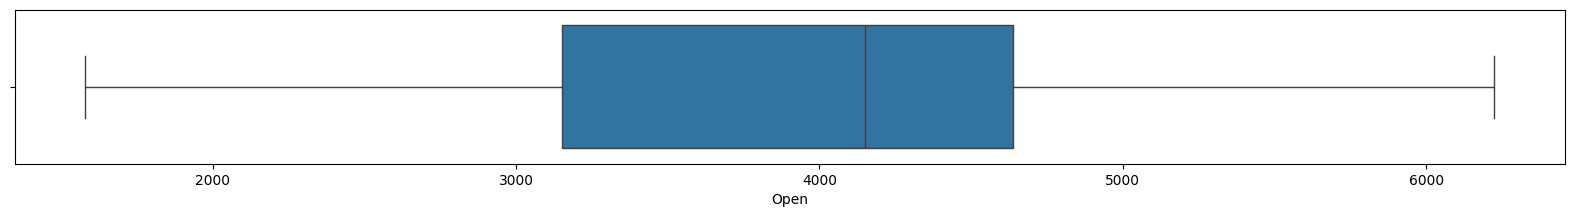

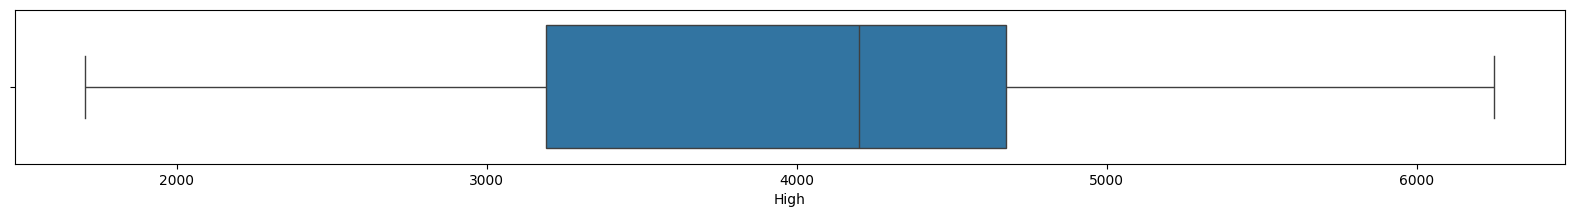

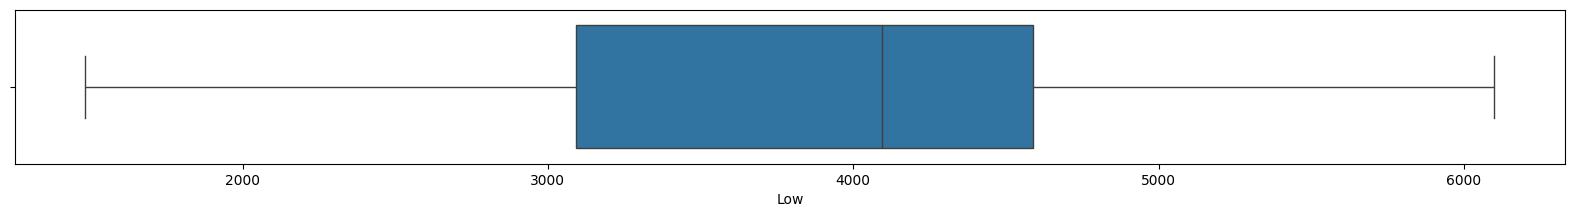

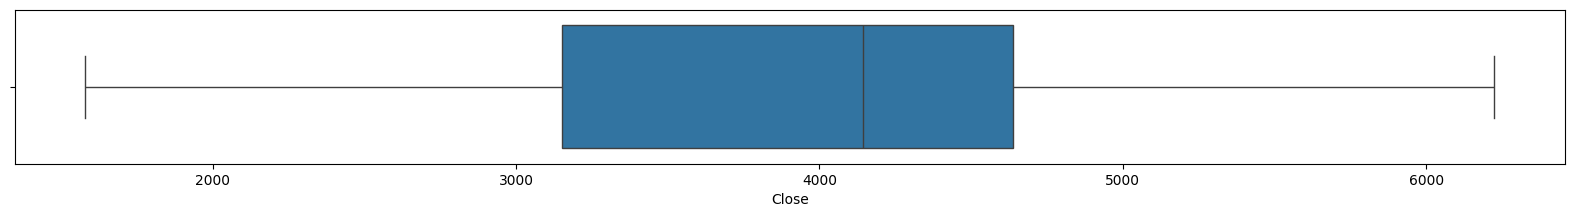

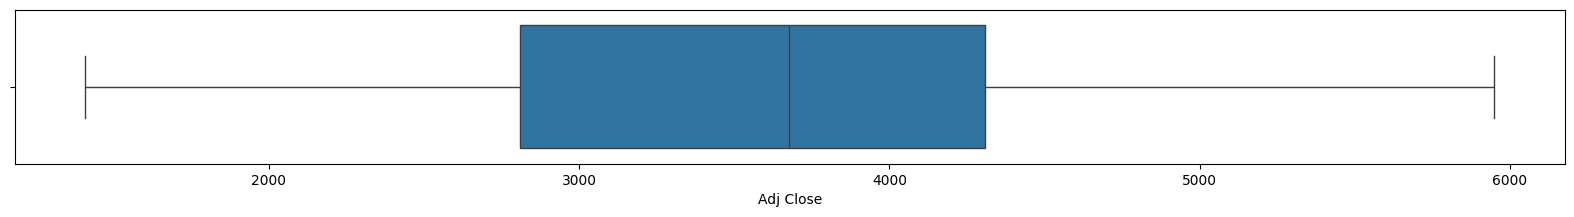

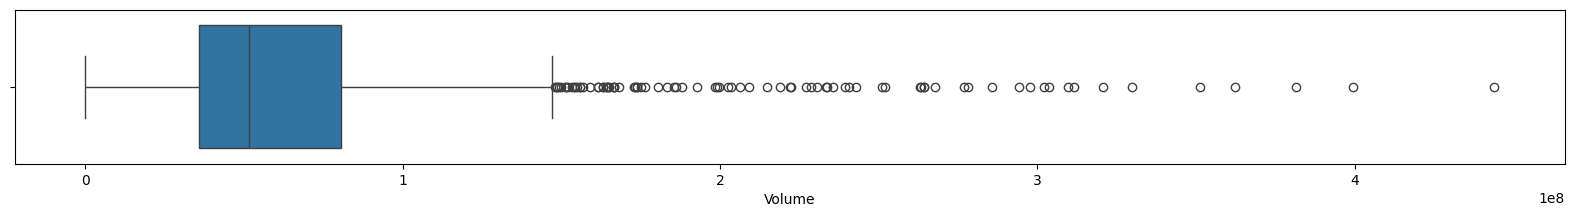

In [100]:
df_outlier = df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure(figsize=(20,2))
        sns.boxplot(data=df_outlier, x=column)

Dari boxplot dapat terlihat bahwa kolom-kolom yang ada tidak memiliki outlier kecuali kolom Volume

#### a. Menghitung Jumlah Outlier

In [101]:
q1 = df_outlier.quantile(0.25)
q3 = df_outlier.quantile(0.75)
iqr = q3 - q1
iqr

Open         1.487500e+03
High         1.484375e+03
Low          1.496875e+03
Close        1.487500e+03
Adj Close    1.498442e+03
Volume       4.466095e+07
dtype: float64

In [102]:
batas_bawah = q1 - 1.5 * iqr
batas_bawah

Open         9.187500e+02
High         9.640625e+02
Low          8.453125e+02
Close        9.187500e+02
Adj Close    5.605853e+02
Volume      -3.103018e+07
dtype: float64

In [103]:
batas_atas = q3 + 1.5 * iqr
batas_atas

Open         6.868750e+03
High         6.901562e+03
Low          6.832812e+03
Close        6.868750e+03
Adj Close    6.554352e+03
Volume       1.476136e+08
dtype: float64

In [104]:
df_outlier = (df.select_dtypes(exclude="object") < batas_bawah) | (df.select_dtypes(exclude="object") > batas_atas)

In [105]:
df_outlier.sum()

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       83
dtype: int64

Setelah dihitung, ternyata kolom Volume ternyata memiliki 83 outlier. Namun, karena outlier dalam volume perdagangan saham bisa merepresentasikan peristiwa penting, seperti lonjakan aktivitas perdagangan yang mungkin berhubungan dengan perubahan signifikan pada harga saham, saya membiarkan outlier tersebut dan langsung masuk ke tahap selanjutnya.

### 3. Melakukan Scaling

Saya memilih metode Robust Scaler untuk mengubah skala data dengan mempertahankan ketahanan terhadap nilai-nilai ekstrem atau outlier.

In [106]:
from sklearn.preprocessing import RobustScaler

In [107]:
columns = ['Open', 'High', 'Low', 'Volume']

In [108]:
columns

['Open', 'High', 'Low', 'Volume']

In [109]:
scaler = RobustScaler()

In [110]:
df_robust = scaler.fit_transform(df[columns])

In [111]:
df_robust = pd.DataFrame(df_robust, columns = columns)

In [112]:
df_robust.head()

,Open,High,Low,Volume
0,0.168067,0.134737,0.204593,-1.153706
1,0.168067,0.134737,0.162839,-0.802589
2,0.126050,0.126316,0.154489,-0.674168
3,0.142857,0.134737,0.162839,-0.233918
4,0.176471,0.176842,0.212944,-0.076519


In [113]:
df_robust.max()

Open      1.394958
High      1.381053
Low       1.340292
Volume    8.789777
dtype: float64

#### a. Visualisasi Hasil Scaling

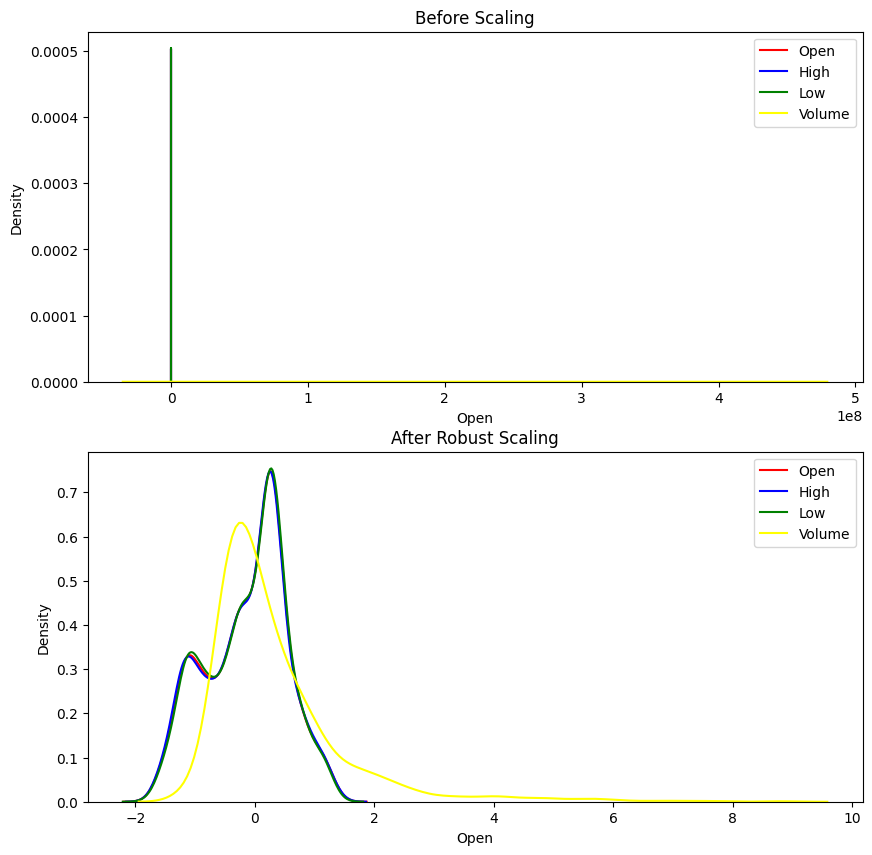

In [116]:
fig, axes = plt.subplots(nrows=2, figsize=(10, 10))

axes[0].set_title('Before Scaling')
sns.kdeplot(df[columns[0]], ax=axes[0], color='red', label=columns[0])
sns.kdeplot(df[columns[1]], ax=axes[0], color='blue', label=columns[1])
sns.kdeplot(df[columns[2]], ax=axes[0], color='green', label=columns[2])
sns.kdeplot(df[columns[3]], ax=axes[0], color='yellow', label=columns[3])
axes[0].legend()

axes[1].set_title('After Robust Scaling')
sns.kdeplot(df_robust[columns[0]], ax=axes[1], color='red', label=columns[0])
sns.kdeplot(df_robust[columns[1]], ax=axes[1], color='blue', label=columns[1])
sns.kdeplot(df_robust[columns[2]], ax=axes[1], color='green', label=columns[2])
sns.kdeplot(df_robust[columns[3]], ax=axes[1], color='yellow', label=columns[3])
axes[1].legend()

# plt.tight_layout()
# plt.show()

#### b. Menghitung Coefficient of Variation

In [117]:
import numpy as np

In [118]:
cv_before_scaling = np.std(df[columns]) / df[columns].mean(axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [119]:
cv_robust = np.std(df_robust[columns]) / df_robust[columns].mean(axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3603: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [120]:
print('CV Before Scaling:\n', cv_before_scaling)
print('-'*25)
print('CV After Robust Scaling:\n', cv_robust)

CV Before Scaling:
 Open      0.254058
High      0.252091
Low       0.256419
Volume    0.756313
dtype: float64
-------------------------
CV After Robust Scaling:
 Open     -4.923915
High     -4.818457
Low      -5.033405
Volume    3.378436
dtype: float64


## D. Modeling

In [140]:
X = df_robust[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [141]:
X.head()

,Open,High,Low,Volume
0,0.168067,0.134737,0.204593,-1.153706
1,0.168067,0.134737,0.162839,-0.802589
2,0.126050,0.126316,0.154489,-0.674168
3,0.142857,0.134737,0.162839,-0.233918
4,0.176471,0.176842,0.212944,-0.076519


In [142]:
y.head()

0    4400.0
1    4362.5
2    4362.5
3    4362.5
4    4437.5
Name: Close, dtype: float64

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [145]:
X_train.head()

,Open,High,Low,Volume
434,-1.277311,-1.266526,-1.245094,1.006589
992,0.310924,0.303158,0.346555,-0.471401
349,-1.556303,-1.569684,-1.562422,0.964771
942,0.235294,0.261053,0.263048,0.349787
371,-1.260504,-1.290105,-1.248434,0.693062


In [146]:
X_test.head()

,Open,High,Low,Volume
654,-0.957983,-0.985263,-0.972860,-0.249605
312,-1.247059,-1.283368,-1.331942,2.082553
224,-0.235294,-0.252632,-0.229645,-0.488789
608,-0.924370,-0.951579,-0.897704,-0.515587
1236,0.957983,0.976842,0.972860,0.203332


In [147]:
y_train.head()

434    2270.0
992    4612.5
349    1770.0
942    4500.0
371    2240.0
Name: Close, dtype: float64

In [148]:
y_test.head()

654     2675.0
312     2100.0
224     3775.0
608     2762.5
1236    5575.0
Name: Close, dtype: float64

In [149]:
from sklearn.linear_model import LinearRegression

In [150]:
linear_model = LinearRegression()

In [151]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [152]:
y_pred_linear = linear_model.predict(X_test)
# print("Prediction for test set: {}".format(y_pred_lr))

In [153]:
df_result = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_linear})

In [154]:
df_result.head()

,Actual value,Predicted value
654,2675.0,2669.667243
312,2100.0,2145.599786
224,3775.0,3782.602462
608,2762.5,2766.638000
1236,5575.0,5613.765986


## E. Evaluation

In [159]:
y_test

654     2675.0
312     2100.0
224     3775.0
608     2762.5
1236    5575.0
         ...  
165     3875.0
1126    4437.5
1174    5100.0
82      4800.0
1395    5600.0
Name: Close, Length: 422, dtype: float64

In [162]:
y_pred_linear

array([2669.66724314, 2145.5997863 , 3782.60246186, 2766.63799955,
       5613.76598621, 2586.07872774, 3035.48277662, 3008.62874431,
       3561.59214239, 3741.37952532, 3631.69565801, 3829.45618784,
       4668.85137508, 5176.03605173, 3718.85572925, 4417.15503164,
       2635.80224212, 5220.78813332, 4799.14746681, 3520.5221682 ,
       2627.99958311, 4104.83119721, 4059.87895031, 4457.20311274,
       2545.33439215, 3405.45533956, 3314.12845065, 2952.03323688,
       2694.60251608, 2041.60042494, 4638.42961887, 4029.58424634,
       3554.78314997, 4581.96485171, 2597.29049846, 4911.25506796,
       4396.33545027, 5075.62592545, 3013.60756404, 4369.10196156,
       3424.83415254, 2553.59342409, 3934.67028776, 4408.09303336,
       3802.37628959, 3079.85582141, 5937.78261299, 5017.53997457,
       5320.84918572, 5794.98969566, 2862.97071274, 3791.62178508,
       4709.6687281 , 2519.08508175, 3935.29347728, 2539.26247876,
       3515.85941828, 4820.05452931, 4380.06919309, 3814.01776

In [163]:
# Evaluasi performa model
from sklearn.metrics import r2_score

# Menghitung R-Squared
r2 = r2_score(y_test, y_pred_linear)

print(f"R-squared Score: {r2}")

R-squared Score: 0.9990656083418807


Nilai R² bernilai 0.9990656083418807, dan sangat mendekati 1. Hal ini menunjukkan bahwa model memiliki kinerja yang sangat baik.

In [164]:
# Membuat dataframe baru yang berisi hasil prediksi
df_result = pd.DataFrame({
    'Date': df.loc[y_test.index, 'Date'],
    'Actual_Price': y_test,
    'Predicted_Price': y_pred_linear,
})

# Mengurutkan dataframe berdasarkan date dan melakukan reset index
df_result = df_result.sort_values('Date').reset_index(drop=True)
df_result.head()

,Date,Actual_Price,Predicted_Price
0,2019-01-02,4362.5,4354.170009
1,2019-01-03,4362.5,4367.846938
2,2019-01-07,4437.5,4450.999875
3,2019-01-08,4450.0,4438.393239
4,2019-01-11,4462.5,4465.515678


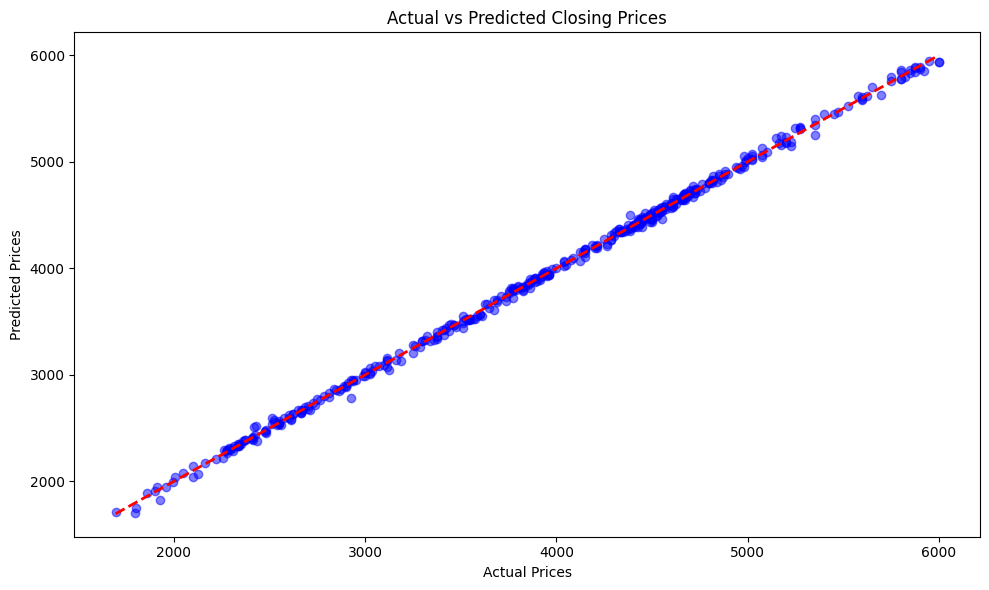

In [165]:
# Visualisasi plot linear regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Closing Prices')
plt.tight_layout()
plt.show()

### F. Membuat Fungsi yang Memprediksi Harga Penutupan Saham Berdasarkan Masukkan (Input) Pengguna

In [168]:
# Function untuk memprediksi closing price berdasarkan input user
def predict_closing_price():
    print("Enter the following values to predict the closing price of BBNI shares:")
    open_price = float(input("Opening Price: "))
    high_price = float(input("Highest Price: "))
    low_price = float(input("Lowest Price: "))
    volume = float(input("Volume: "))
    
    # membuat dataframe baru yang berisi input user
    user_input = pd.DataFrame([[open_price, high_price, low_price, volume]], columns=['Open', 'High', 'Low', 'Volume'])
    
    # Scaling input user
    user_input_scaled = scaler.transform(user_input)
    
    # Membuat prediksi berdasarkan input user
    predicted_price = linear_model.predict(user_input_scaled)
    
    print(f"The predicted closing price of BBNI shares is: {predicted_price[0]}")

In [170]:
# Memanggil function predict_closing_price
predict_closing_price()

Enter the following values to predict the closing price of BBNI shares:


Opening Price:  6100
Highest Price:  6250
Lowest Price:  6100
Volume:  87861700


The predicted closing price of BBNI shares is: 6214.939757934815


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
